In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('F:\Study material\Oasis Infobyte\Advertising.csv')

In [4]:
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [5]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [6]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [7]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


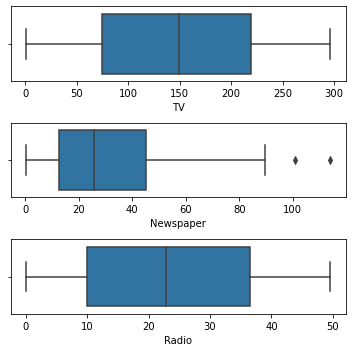

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


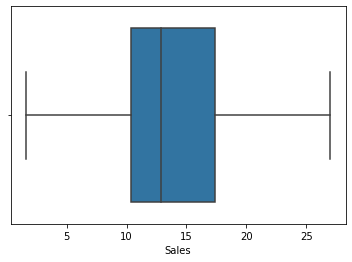

In [11]:
sns.boxplot(df['Sales'])
plt.show()

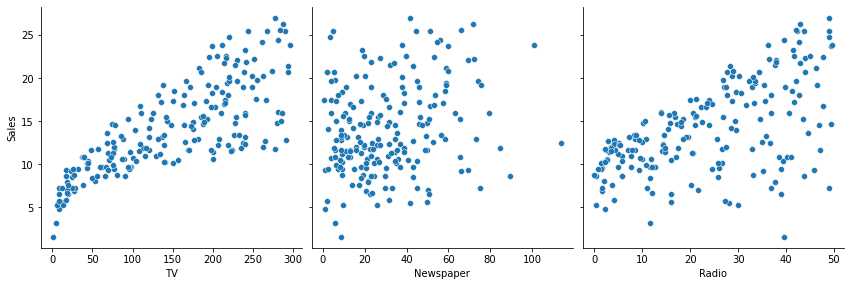

In [12]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

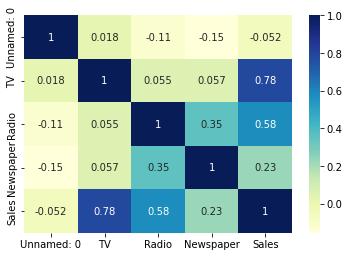

In [13]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [14]:
X = df['TV']
y = df['Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [17]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

In [18]:
import statsmodels.api as sm

In [19]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

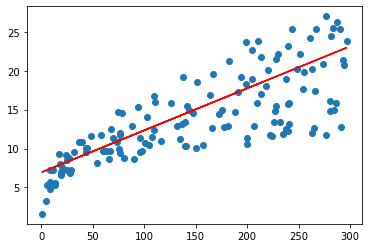

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [23]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


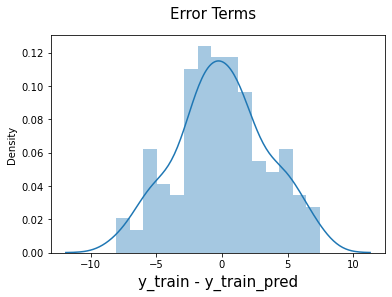

In [24]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

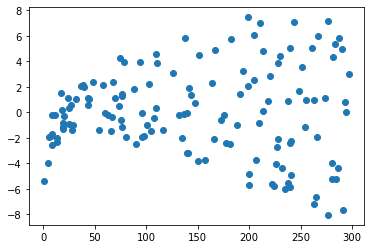

In [25]:
plt.scatter(X_train,res)
plt.show()

In [26]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [27]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [30]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783297

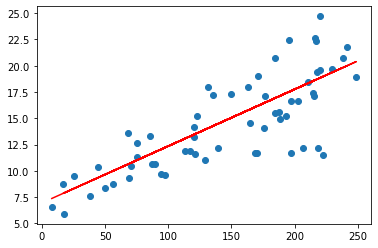

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()